<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/Tweet_Sentiment_Extraction/Tweet_Sentiment_Extraction_EDA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirement

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

/content


In [2]:
!kaggle competitions download -c tweet-sentiment-extraction

  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 170MB/s]


In [3]:
from zipfile import ZipFile
with ZipFile('/content/tweet-sentiment-extraction.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

# First look

In [153]:
train_data = pd.read_csv("/content/train.csv")

## Check 'value_counts', shape & overview

In [7]:
train_data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


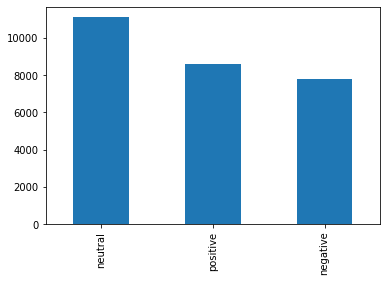

In [9]:
train_data['sentiment'].value_counts().plot(kind='bar')

## Check Nan Value

In [10]:
rowsWithNans = [index for index, row in train_data.iterrows() if row.isnull().any()]

In [11]:
train_data.iloc[rowsWithNans]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


## Check Duplicated data

In [13]:
train_data[train_data.duplicated(['selected_text'], keep=False)].sort_values(by=['selected_text'])

,textID,text,selected_text,sentiment
17300,0879b2ef8e,Webcams Hoepfner Burgfest in #Karlsruhe: Autom...,#fail,negative
10532,4d40befe26,new guitar hero metallica guitar is already br...,#fail,negative
2941,da83070320,#itsucks when everyone but the one i want to t...,#itsucks,negative
17419,04b6ddc2da,_2890 Nt able to follow anyone friendorfollow...,#itsucks,negative
8719,b02f4018dc,Nt able to follow anyone friendorfollow.com h...,#itsucks,negative
...,...,...,...,...
16444,7972343be5,Loves fatty take away nights... yummy then co...,yummy,positive
9536,368ed51322,"Cooking microwave pizzas, yummy",yummy,positive
24883,5bfad683d5,yummy curry save me some please lol,yummy,positive
20247,ab92aa95b3,about to drink a hot chocolate yummy.,yummy.,positive


In [14]:
train_data[train_data.duplicated(['text'], keep=False)].sort_values(by=['text'])

,textID,text,selected_text,sentiment


In [15]:
dict(train_data['selected_text'].value_counts())


{'good': 199,
 'love': 185,
 'Happy': 163,
 'miss': 143,
 'happy': 106,
 'thanks': 98,
 'great': 91,
 'sad': 89,
 'sorry': 82,
 'Thanks': 82,
 'hate': 70,
 'fun': 69,
 'nice': 64,
 'bad': 63,
 '****': 63,
 'Good': 59,
 'hope': 57,
 'wish': 55,
 'awesome': 52,
 'best': 44,
 'tired': 44,
 'sick': 43,
 'excited': 40,
 'like': 39,
 'glad': 37,
 'hurts': 36,
 'missed': 34,
 'HAPPY': 34,
 'sucks': 34,
 'Love': 33,
 'amazing': 32,
 'Sorry': 31,
 'missing': 31,
 'lost': 29,
 'Happy Mother`s Day': 28,
 'better': 27,
 'bored': 26,
 'cool': 26,
 'headache': 25,
 'stupid': 23,
 'enjoy': 23,
 'beautiful': 21,
 'sadly': 20,
 'hopefully': 20,
 'boring': 20,
 'loves': 19,
 'cute': 19,
 'lovely': 19,
 'Hope': 19,
 'Great': 19,
 'I love': 19,
 'Thank': 18,
 'good.': 18,
 'Thanks!': 17,
 'hard': 17,
 'Goodnight': 17,
 'poor': 16,
 'awesome.': 16,
 'awesome!': 16,
 'sad.': 16,
 'stuck': 16,
 'Sad': 15,
 'forgot': 15,
 'favorite': 15,
 'wonderful': 15,
 'thank': 15,
 'i love': 15,
 'tired.': 14,
 'sucks.':

## Check text randomly

In [111]:
for _ in range(3):
  randNum = random.randint(0,train_data.shape[0])
  print(train_data.iloc[randNum,1],' ---> ',train_data.iloc[randNum,2])
  print('-------------------------------------')

pretty bummed that it had to rain last nite! oh well  still had fun! Goldfish is highly overrated!  --->  pretty bummed that it had to rain last nite! oh well  still had fun! Goldfish is highly overrated!
-------------------------------------
ah good idea. library seems to work  thats why i`m not there obviously.  --->  good
-------------------------------------
Working on this **** Financial project, Definitely not having any fun this weekend  , I want to spend it wit my BAAABY waaaah  --->  Definitely not having any fun this weekend
-------------------------------------


# Preprocessing

In [154]:
def RemoveEmojis(text):

  emojiPatterns = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return emojiPatterns.sub(r'', text) # no emoji

In [155]:
train_data = train_data.drop(index=rowsWithNans)

train_data['text'] = (train_data['text']
              .apply(lambda x : re.sub(r"http\S+", '', x))
              .apply(lambda x : re.sub(r"WWW\.\S+", '', x))
              .apply(lambda x : re.sub(r"www\.\S+", '', x))
              .apply(lambda x : re.sub(r"\*{3}", 'BAD_WORD', x))
              .apply(lambda x : re.sub(r"\*{4}", 'BAD_WORD', x))
              .apply(lambda x : RemoveEmojis(x))
)


train_data['selected_text'] = (train_data['selected_text']
              .apply(lambda x : re.sub(r"http\S+", '', x))
              .apply(lambda x : re.sub(r"WWW\.\S+", '', x))
              .apply(lambda x : re.sub(r"www\.\S+", '', x))
              .apply(lambda x : re.sub(r"\*{4}", 'BAD_WORD', x))
              .apply(lambda x : re.sub(r"\*{3}", 'BAD_WORD', x))
              .apply(lambda x : RemoveEmojis(x))
              
)

train_data['Tags'] = train_data['text'].apply(lambda x : re.findall(r"\#\S+",x))

In [159]:
for _ in range(3):
  randNum = random.randint(0,train_data.shape[0])
  print(train_data.iloc[randNum,1],' ---> ',train_data.iloc[randNum,2])
  print('-------------------------------------')

I`m feeling so weak and tired from seating down in front of the pc. I really need to study for my HA long quiz.  --->  I`m feeling so weak and tired
-------------------------------------
Happy Mothers Day all!  Hugs and love, Zoe  --->  Happy Mothers Day all!
-------------------------------------
chapter 27... probably on monday. i still need more comments.  --->  chapter 27... probably on monday. i still need more comments.
-------------------------------------


In [151]:
train_data.sample(4)

,textID,text,selected_text,sentiment,Tags
13889,06f52ce0e5,The Gray Hat Python book reminded me how many ...,which is a pain if you need to use all of them,negative,[]
4572,98f4203728,lol nah no swine flu for me bro. lmao what`s ...,lol nah no swine flu for me bro. lmao what`s u...,neutral,[]
17348,cd7852c045,All of a sudden I`m craving broccoli and chees...,bad..,negative,[]
26015,6256af4595,says again.. happy mothers day to all your moms,happy mothers day,positive,[]
